<a href="https://colab.research.google.com/github/mbparsons/code/blob/master/Merging%20ad%20spend%20data%20%26%20Google%20Trends%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
data = 'drive/My Drive/Colab Notebooks/mercedesbenz.googletrends.csv'
mb = pd.read_csv(data,parse_dates=['period'])

In [0]:
mb.head()

,Unnamed: 0,date,value,period,onediffvalue
0,0,Oct 07 2013,3997.423359,2013-10-07,NaN
1,1,Oct 08 2013,4175.337771,2013-10-08,177.914412
2,2,Oct 09 2013,4024.925648,2013-10-09,-150.412123
3,3,Oct 10 2013,3887.818761,2013-10-10,-137.106887
4,4,Oct 11 2013,4111.597680,2013-10-11,223.778919


In [0]:
mb['date'] = pd.to_datetime(mb['date'])

Weeks start on Monday.

In [0]:
df1 = mb.resample('W', on='date', label = 'left', loffset= '1D').mean()

In [0]:
df1.head()

,Unnamed: 0,value,onediffvalue
date,,,
2013-10-07,3,4122.608701,27.059775
2013-10-14,10,4073.020551,-8.473709
2013-10-21,17,4106.416964,14.768580
2013-10-28,24,3942.066792,-15.370406
2013-11-04,31,3643.773861,-46.529863


In [0]:
data = 'drive/My Drive/Colab Notebooks/mercedesbenz.adspend.csv'
mb = pd.read_csv(data)

In [0]:
mb['TIME PERIOD'] = mb['TIME PERIOD'].str.replace("WEEK OF\ ","") 

In [0]:
mb['TIME PERIOD'] = mb['TIME PERIOD'].str.replace("\ \(B\)","") 

In [0]:
mb['TIME PERIOD'] = pd.to_datetime(mb['TIME PERIOD'])

In [0]:
mb.columns = mb.columns.str.replace("\ DOLS \(000\)","")

In [0]:
timedata = pd.pivot_table(mb,index=["TIME PERIOD"],values=['TOTAL','NETWORK TV','CABLE TV','SYNDICATION','SPOT TV','MAGAZINES','SUNDAY MAGS','NATL NEWSP','NEWSPAPER','NETWORK RADIO','NAT SPOT RADIO','OUTDOOR'],aggfunc=np.sum)

In [0]:
timedata.head()

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL
TIME PERIOD,,,,,,,,,,,,
2013-10-07,1942.7,1058.2,0.2,0.0,65.9,1313.8,0.0,0.0,2130.2,0.0,0.0,6511.0
2013-10-14,2151.5,49.8,0.2,475.5,65.9,3855.3,0.0,0.0,1210.9,0.0,0.0,7809.1
2013-10-21,2076.5,705.3,0.2,0.0,65.9,2860.4,0.0,0.0,1822.7,0.0,0.0,7531.2
2013-10-28,2089.9,3400.3,0.4,0.0,67.6,4891.6,6.7,181.6,1669.5,0.0,2.0,12309.6
2013-11-04,484.1,356.0,0.6,0.0,69.9,4014.6,0.0,0.0,10.0,0.0,0.0,4935.2


In [0]:
final = df1.join(timedata)

In [0]:
final.head()

,Unnamed: 0,value,onediffvalue,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL
date,,,,,,,,,,,,,,,
2013-10-07,3,4122.608701,27.059775,1942.7,1058.2,0.2,0.0,65.9,1313.8,0.0,0.0,2130.2,0.0,0.0,6511.0
2013-10-14,10,4073.020551,-8.473709,2151.5,49.8,0.2,475.5,65.9,3855.3,0.0,0.0,1210.9,0.0,0.0,7809.1
2013-10-21,17,4106.416964,14.768580,2076.5,705.3,0.2,0.0,65.9,2860.4,0.0,0.0,1822.7,0.0,0.0,7531.2
2013-10-28,24,3942.066792,-15.370406,2089.9,3400.3,0.4,0.0,67.6,4891.6,6.7,181.6,1669.5,0.0,2.0,12309.6
2013-11-04,31,3643.773861,-46.529863,484.1,356.0,0.6,0.0,69.9,4014.6,0.0,0.0,10.0,0.0,0.0,4935.2


In [0]:
final = final.drop(['Unnamed: 0','onediffvalue','TOTAL'], axis=1)

In [0]:
final.head()

,value,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION
date,,,,,,,,,,,,
2013-10-07,4122.608701,1942.7,1058.2,0.2,0.0,65.9,1313.8,0.0,0.0,2130.2,0.0,0.0
2013-10-14,4073.020551,2151.5,49.8,0.2,475.5,65.9,3855.3,0.0,0.0,1210.9,0.0,0.0
2013-10-21,4106.416964,2076.5,705.3,0.2,0.0,65.9,2860.4,0.0,0.0,1822.7,0.0,0.0
2013-10-28,3942.066792,2089.9,3400.3,0.4,0.0,67.6,4891.6,6.7,181.6,1669.5,0.0,2.0
2013-11-04,3643.773861,484.1,356.0,0.6,0.0,69.9,4014.6,0.0,0.0,10.0,0.0,0.0


In [0]:
from string import ascii_letters
import matplotlib.pyplot as plt

In [0]:
corr = final.corr()
corr

,value,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION
value,1.000000,0.129790,-0.074324,-0.033151,-0.114441,0.129731,0.033319,0.109694,-0.198217,0.140637,0.106349,-0.043775
CABLE TV,0.129790,1.000000,0.060639,0.026786,0.188095,-0.011125,0.413298,0.097719,-0.023052,0.249623,0.027857,0.175320
MAGAZINES,-0.074324,0.060639,1.000000,0.037290,-0.046631,-0.025368,0.093764,0.064883,0.645499,0.080139,0.143893,-0.032943
NAT SPOT RADIO,-0.033151,0.026786,0.037290,1.000000,0.089201,0.073605,0.032461,0.001731,0.040453,-0.026018,0.106700,0.006459
NATL NEWSP,-0.114441,0.188095,-0.046631,0.089201,1.000000,0.399412,0.055684,-0.051845,-0.059273,0.157581,0.049852,0.073500
NETWORK RADIO,0.129731,-0.011125,-0.025368,0.073605,0.399412,1.000000,-0.119105,-0.106050,-0.033969,0.130891,-0.011209,0.047707
NETWORK TV,0.033319,0.413298,0.093764,0.032461,0.055684,-0.119105,1.000000,0.006549,0.034767,0.122837,0.036033,0.227634
NEWSPAPER,0.109694,0.097719,0.064883,0.001731,-0.051845,-0.106050,0.006549,1.000000,-0.021801,-0.021427,0.027292,-0.031804
OUTDOOR,-0.198217,-0.023052,0.645499,0.040453,-0.059273,-0.033969,0.034767,-0.021801,1.000000,-0.003184,0.039967,0.053226
SPOT TV,0.140637,0.249623,0.080139,-0.026018,0.157581,0.130891,0.122837,-0.021427,-0.003184,1.000000,-0.020952,-0.024820


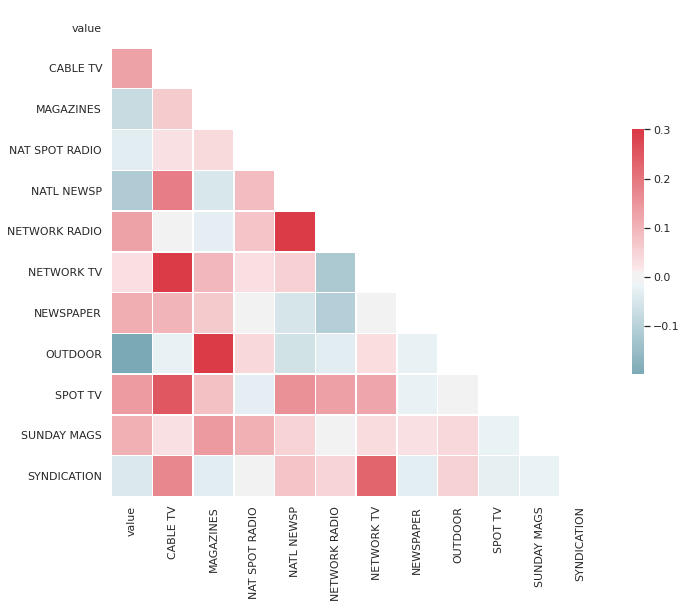

In [0]:
sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The strongest correlation is between NATL NEWSP and NETWORK RADIO. MAGAZINES and OUTDOOR, NETWORK TV and CABLE TV, and value and OUTDOOR also have strong correlations.

# Granger Causality

In [0]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [0]:
mag = final[['value', 'MAGAZINES']]

In [0]:
out = final[['value', 'OUTDOOR']]

In [0]:
magresults = grangercausalitytests(mag,4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5937  , p=0.0591  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=3.6357  , p=0.0566  , df=1
likelihood ratio test: chi2=3.6105  , p=0.0574  , df=1
parameter F test:         F=3.5937  , p=0.0591  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.8185  , p=0.0232  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=7.7873  , p=0.0204  , df=2
likelihood ratio test: chi2=7.6725  , p=0.0216  , df=2
parameter F test:         F=3.8185  , p=0.0232  , df_denom=254, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.9301  , p=0.0091  , df_denom=251, df_num=3
ssr based chi2 test:   chi2=12.1192 , p=0.0070  , df=3
likelihood ratio test: chi2=11.8431 , p=0.0079  , df=3
parameter F test:         F=3.9301  , p=0.0091  , df_denom=251, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.1936  , p=0.0026  

In [0]:
for i in range(1,5):
  if magresults[i][0]['params_ftest'][1] < 0.5:
    print(magresults[i][0]['params_ftest'][1])
    print("The Granger Test is significant with a " + str(i) + " week lag" )

0.05912063158903121
The Granger Test is significant with a 1 week lag
0.02323291937041543
The Granger Test is significant with a 2 week lag
0.009117495965246167
The Granger Test is significant with a 3 week lag
0.0026459895842776316
The Granger Test is significant with a 4 week lag


In [0]:
outresults = grangercausalitytests(out,4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4971  , p=0.0198  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=5.5612  , p=0.0184  , df=1
likelihood ratio test: chi2=5.5026  , p=0.0190  , df=1
parameter F test:         F=5.4971  , p=0.0198  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.7192  , p=0.0037  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=11.6635 , p=0.0029  , df=2
likelihood ratio test: chi2=11.4085 , p=0.0033  , df=2
parameter F test:         F=5.7192  , p=0.0037  , df_denom=254, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.3908  , p=0.0013  , df_denom=251, df_num=3
ssr based chi2 test:   chi2=16.6234 , p=0.0008  , df=3
likelihood ratio test: chi2=16.1098 , p=0.0011  , df=3
parameter F test:         F=5.3908  , p=0.0013  , df_denom=251, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7874  , p=0.0052  

In [0]:
for i in range(1,5):
  if outresults[i][0]['params_ftest'][1] < 0.5:
    print(outresults[i][0]['params_ftest'][1])
    print("The Granger Test is significant with a " + str(i) + " week lag" )

0.019810107113915162
The Granger Test is significant with a 1 week lag
0.003719547786008316
The Granger Test is significant with a 2 week lag
0.0013041139049766346
The Granger Test is significant with a 3 week lag
0.005217307649852048
The Granger Test is significant with a 4 week lag


It appears possible that magazine advertising has a delayed effect on Google Trends.

It appears possible that outdoor advertising has a delayed effect on Google Trends.